<a href="https://colab.research.google.com/github/gr-oll/susFin/blob/main/Finance_HW_2_Simon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import pandas as pd
import io
import requests

**Exercise 1**

In [225]:
url = "https://github.com/gr-oll/susFin/blob/main/Data/Static.xlsx?raw=true"
response = requests.get(url)
Static = pd.read_excel(io.BytesIO(response.content))

In [226]:
Static = Static.rename(columns={'Name': 'NAME'})

In [227]:
print(Static.head())


           ISIN                                NAME Country Region
0  AN8068571086                        SCHLUMBERGER      US   AMER
1  ARALUA010258                               ALUAR      AR     EM
2  ARP125991090                BANCO BBVA ARGENTINA      AR     EM
3  ARSIDE010029  TERNIUM ARGENTINA SOCIEDAD ANONIMA      AR     EM
4  AT000000STR1                          STRABAG SE      AT    EUR


In [228]:
url = "https://github.com/gr-oll/susFin/blob/main/Data/DS_EScore_Y.xlsx?raw=true"
response = requests.get(url)
Escore = pd.read_excel(io.BytesIO(response.content))

In [229]:
Escore = pd.melt(Escore, id_vars=['NAME','ISIN'], var_name='DATE', value_name='ESCORE')

In [230]:
print(Escore.head())

                                 NAME          ISIN  DATE  ESCORE
0                        SCHLUMBERGER  AN8068571086  1999     NaN
1                               ALUAR  ARALUA010258  1999     NaN
2                BANCO BBVA ARGENTINA  ARP125991090  1999     NaN
3  TERNIUM ARGENTINA SOCIEDAD ANONIMA  ARSIDE010029  1999     NaN
4                          STRABAG SE  AT000000STR1  1999     NaN


In [231]:
Merged = pd.merge(Static , Escore, on=('NAME','ISIN'))
print(Merged)

               ISIN          NAME Country Region  DATE  ESCORE
0      AN8068571086  SCHLUMBERGER      US   AMER  1999     NaN
1      AN8068571086  SCHLUMBERGER      US   AMER  2000     NaN
2      AN8068571086  SCHLUMBERGER      US   AMER  2001     NaN
3      AN8068571086  SCHLUMBERGER      US   AMER  2002   53.65
4      AN8068571086  SCHLUMBERGER      US   AMER  2003   23.33
...             ...           ...     ...    ...   ...     ...
62695  ZAE000322095        NAMPAK      ZA     EM  2019   23.19
62696  ZAE000322095        NAMPAK      ZA     EM  2020   29.18
62697  ZAE000322095        NAMPAK      ZA     EM  2021   32.98
62698  ZAE000322095        NAMPAK      ZA     EM  2022   32.27
62699  ZAE000322095        NAMPAK      ZA     EM  2023   28.72

[62700 rows x 6 columns]


In [232]:
Merged = Merged[Merged['Region'] == 'PAC']

In [233]:
print(Merged.head)

<bound method NDFrame.head of                ISIN                          NAME Country Region  DATE  ESCORE
425    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  1999     NaN
426    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2000     NaN
427    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2001     NaN
428    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2002     NaN
429    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2003     NaN
...             ...                           ...     ...    ...   ...     ...
60070  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2019   41.10
60071  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2020   44.19
60072  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2021   40.79
60073  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2022   43.66
60074  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2023     NaN

[12575 rows x 6 colum

In [234]:
Merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12575 entries, 425 to 60074
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ISIN     12575 non-null  object 
 1   NAME     12575 non-null  object 
 2   Country  12575 non-null  object 
 3   Region   12575 non-null  object 
 4   DATE     12575 non-null  object 
 5   ESCORE   9337 non-null   float64
dtypes: float64(1), object(5)
memory usage: 687.7+ KB


In [235]:
nan_companies = Merged[Merged['ESCORE'].isna()]['NAME']
print(nan_companies)

425      ADBRI DEAD - DELIST.02/07/24
426      ADBRI DEAD - DELIST.02/07/24
427      ADBRI DEAD - DELIST.02/07/24
428      ADBRI DEAD - DELIST.02/07/24
429      ADBRI DEAD - DELIST.02/07/24
                     ...             
60057          TRIP COM GROUP ADR 1:1
60058          TRIP COM GROUP ADR 1:1
60059          TRIP COM GROUP ADR 1:1
60060          TRIP COM GROUP ADR 1:1
60074          TRIP COM GROUP ADR 1:1
Name: NAME, Length: 3238, dtype: object


In [236]:
Merged = Merged.dropna()


In [237]:
print(Merged)

               ISIN                          NAME Country Region  DATE  ESCORE
434    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2008   43.15
435    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2009   38.27
436    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2010   65.91
437    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2011   60.10
438    AU000000ABC7  ADBRI DEAD - DELIST.02/07/24      AU    PAC  2012   59.57
...             ...                           ...     ...    ...   ...     ...
60069  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2018    6.92
60070  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2019   41.10
60071  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2020   44.19
60072  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2021   40.79
60073  US89677Q1076        TRIP COM GROUP ADR 1:1      SG    PAC  2022   43.66

[9337 rows x 6 columns]


In [238]:
cross_sectional_means = Merged.groupby('DATE')['ESCORE'].mean()
print(cross_sectional_means)

DATE
2002    38.992857
2003    44.229459
2004    25.060284
2005    25.501198
2006    27.060121
2007    33.752930
2008    38.976818
2009    40.002733
2010    41.790657
2011    43.283176
2012    44.041168
2013    44.094426
2014    44.918241
2015    47.374888
2016    50.181687
2017    52.602398
2018    55.560588
2019    58.830000
2020    60.958800
2021    62.894355
2022    64.276986
2023    64.588267
Name: ESCORE, dtype: float64


In [239]:
cross_sectional_stats = Merged.groupby('DATE')['ESCORE'].agg(['mean', 'median', 'min', 'max', 'std'])
print(cross_sectional_stats)

           mean  median   min    max        std
DATE                                           
2002  38.992857  40.310  0.00  85.67  26.962122
2003  44.229459  45.370  0.00  89.75  26.476245
2004  25.060284  21.375  0.00  93.79  26.189515
2005  25.501198  23.610  0.00  98.10  25.900356
2006  27.060121  23.630  0.00  99.10  25.591831
2007  33.752930  30.795  0.00  98.53  27.114923
2008  38.976818  39.575  0.00  96.12  27.776948
2009  40.002733  40.295  0.00  97.60  28.141602
2010  41.790657  42.650  0.00  97.13  29.058226
2011  43.283176  46.200  0.00  95.02  28.337434
2012  44.041168  47.185  0.00  92.53  28.006196
2013  44.094426  47.365  0.00  93.77  27.805898
2014  44.918241  48.070  0.00  96.25  27.667351
2015  47.374888  50.350  0.00  95.28  27.405171
2016  50.181687  53.925  0.00  95.52  26.563757
2017  52.602398  56.865  0.00  96.13  26.199252
2018  55.560588  60.100  0.00  96.53  25.262380
2019  58.830000  63.990  0.00  98.21  23.992684
2020  60.958800  65.435  0.00  97.41  23

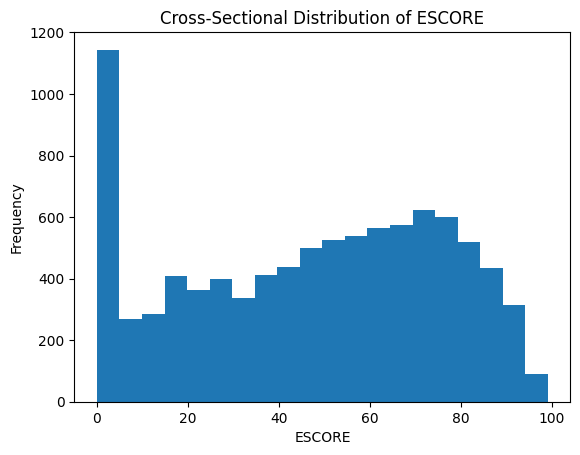

In [240]:
import matplotlib.pyplot as plt

# Assuming 'Merged' is your DataFrame and 'ESCORE' is the column of interest
plt.hist(Merged['ESCORE'], bins=20)  # Adjust 'bins' as needed
plt.xlabel('ESCORE')
plt.ylabel('Frequency')
plt.title('Cross-Sectional Distribution of ESCORE')
plt.show()

**Question 2**